### libraries

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


### building the CNN

In [2]:
classifier = Sequential()

classifier.add(Conv2D(32,(3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Conv2D(32,(3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

### compiling the CNN

In [3]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### image augmenting
using Keras ImageDataGenerator, because we need more varity in data<br>
hence shearing, zooming, fliping

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory("dataset/training_set",
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

testing_set = test_datagen.flow_from_directory("dataset/test_set",
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### always create checkpoints
'cause you never know when the collab notebook would stop running

In [6]:
from keras.callbacks import ModelCheckpoint

filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

### fitting the data into classifier model

In [8]:
classifier.fit_generator(training_set, 
                         steps_per_epoch=8000, 
                         epochs=25, 
                         validation_data=testing_set, 
                         validation_steps=2000, 
                         callbacks=callbacks_list)

Epoch 1/25
8000/8000 [==============================] - 2390s 299ms/step - loss: 0.3353 - acc: 0.8472 - val_loss: 0.6260 - val_acc: 0.8035

Epoch 00001: loss improved from inf to 0.33535, saving model to weights-improvement-01-0.3353.hdf5
Epoch 2/25
8000/8000 [==============================] - 2297s 287ms/step - loss: 0.0977 - acc: 0.9635 - val_loss: 0.9641 - val_acc: 0.7927

Epoch 00002: loss improved from 0.33535 to 0.09770, saving model to weights-improvement-02-0.0977.hdf5
Epoch 3/25
8000/8000 [==============================] - 2185s 273ms/step - loss: 0.0495 - acc: 0.9826 - val_loss: 1.0920 - val_acc: 0.7884

Epoch 00003: loss improved from 0.09770 to 0.04952, saving model to weights-improvement-03-0.0495.hdf5
Epoch 4/25
8000/8000 [==============================] - 2951s 369ms/step - loss: 0.0353 - acc: 0.9879 - val_loss: 1.2332 - val_acc: 0.7964

Epoch 00004: loss improved from 0.04952 to 0.03529, saving model to weights-improvement-04-0.0353.hdf5
Epoch 5/25
8000/8000 [==========

#### this code-block is for when there's a need for loading weights from a specific epoch

In [ ]:
filename = ""
classifier.load_weights(filename)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### testing the classifier
by downloading images of cat and dog from Google

In [9]:
test_image = image.load_img("dataset/single_prediction/cat_or_dog_1.jpg", 
                            target_size = (64, 64))
# till here test_image is storing an image,
# now to convert it to a 3D array
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

now if we add this (64x64x3) array of test image directly to the classifier, it shows an error, because our classifier expectes the values to be in the batches of items, therefore, it should be a single batch of single image which is again a 3d array of size 64x64.

Hence we'll expand the dimension of the numpy array and add a new value at position 0 which will mark the batch number, such that the dimension of the test image becomes (1, 64, 64, 3)

In [10]:
test_image = np.expand_dims(test_image, axis = 0)
print(test_image.shape)

result = classifier.predict(test_image)
print(result.shape)

print("result: ", result)

(1, 64, 64, 3)
(1, 1)
result:  [[1.]]


okay, but we don't know what does 1 and 0 here correspond to ? So,

In [11]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
if result[0][0] == 1: # because result has the shape of (1,1)
    prediction = 'dog'
else:
    prediction = 'cat'

prediction

'dog'

let's verify by seeing the image itself:

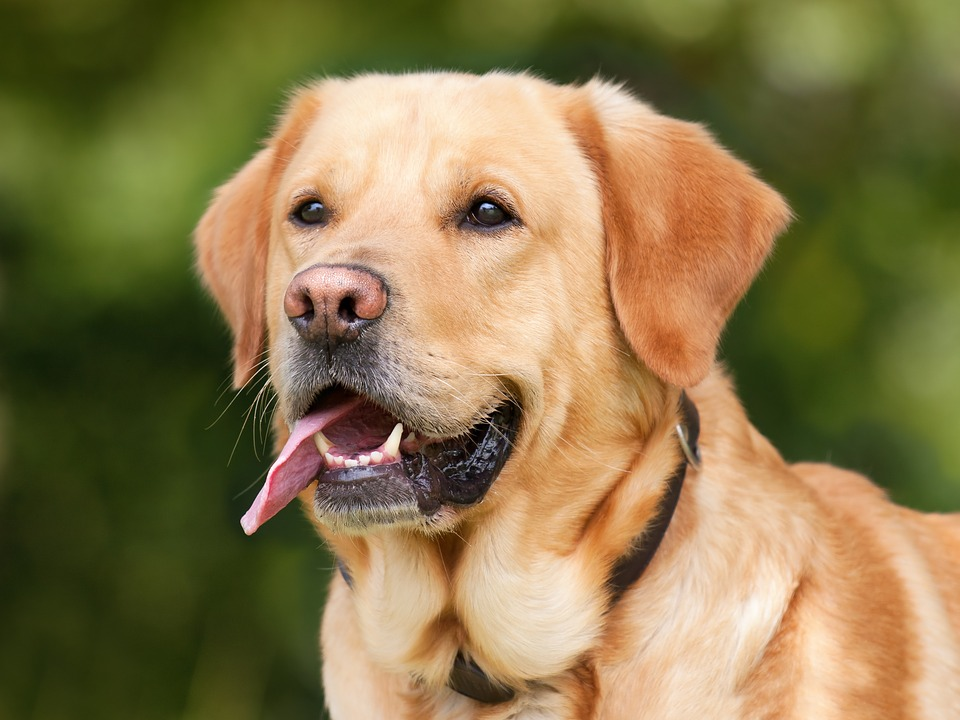

In [30]:
from IPython.display import Image
Image(filename="dataset/single_prediction/cat_or_dog_1.jpg", width=250, height=250)

let's check on another image from google

In [14]:
test_image = image.load_img("dataset/single_prediction/cat_or_dog_2.jpg", 
                            target_size = (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 1: # because result has the shape of (1,1)
    prediction = 'dog'
else:
    prediction = 'cat'
prediction

'cat'

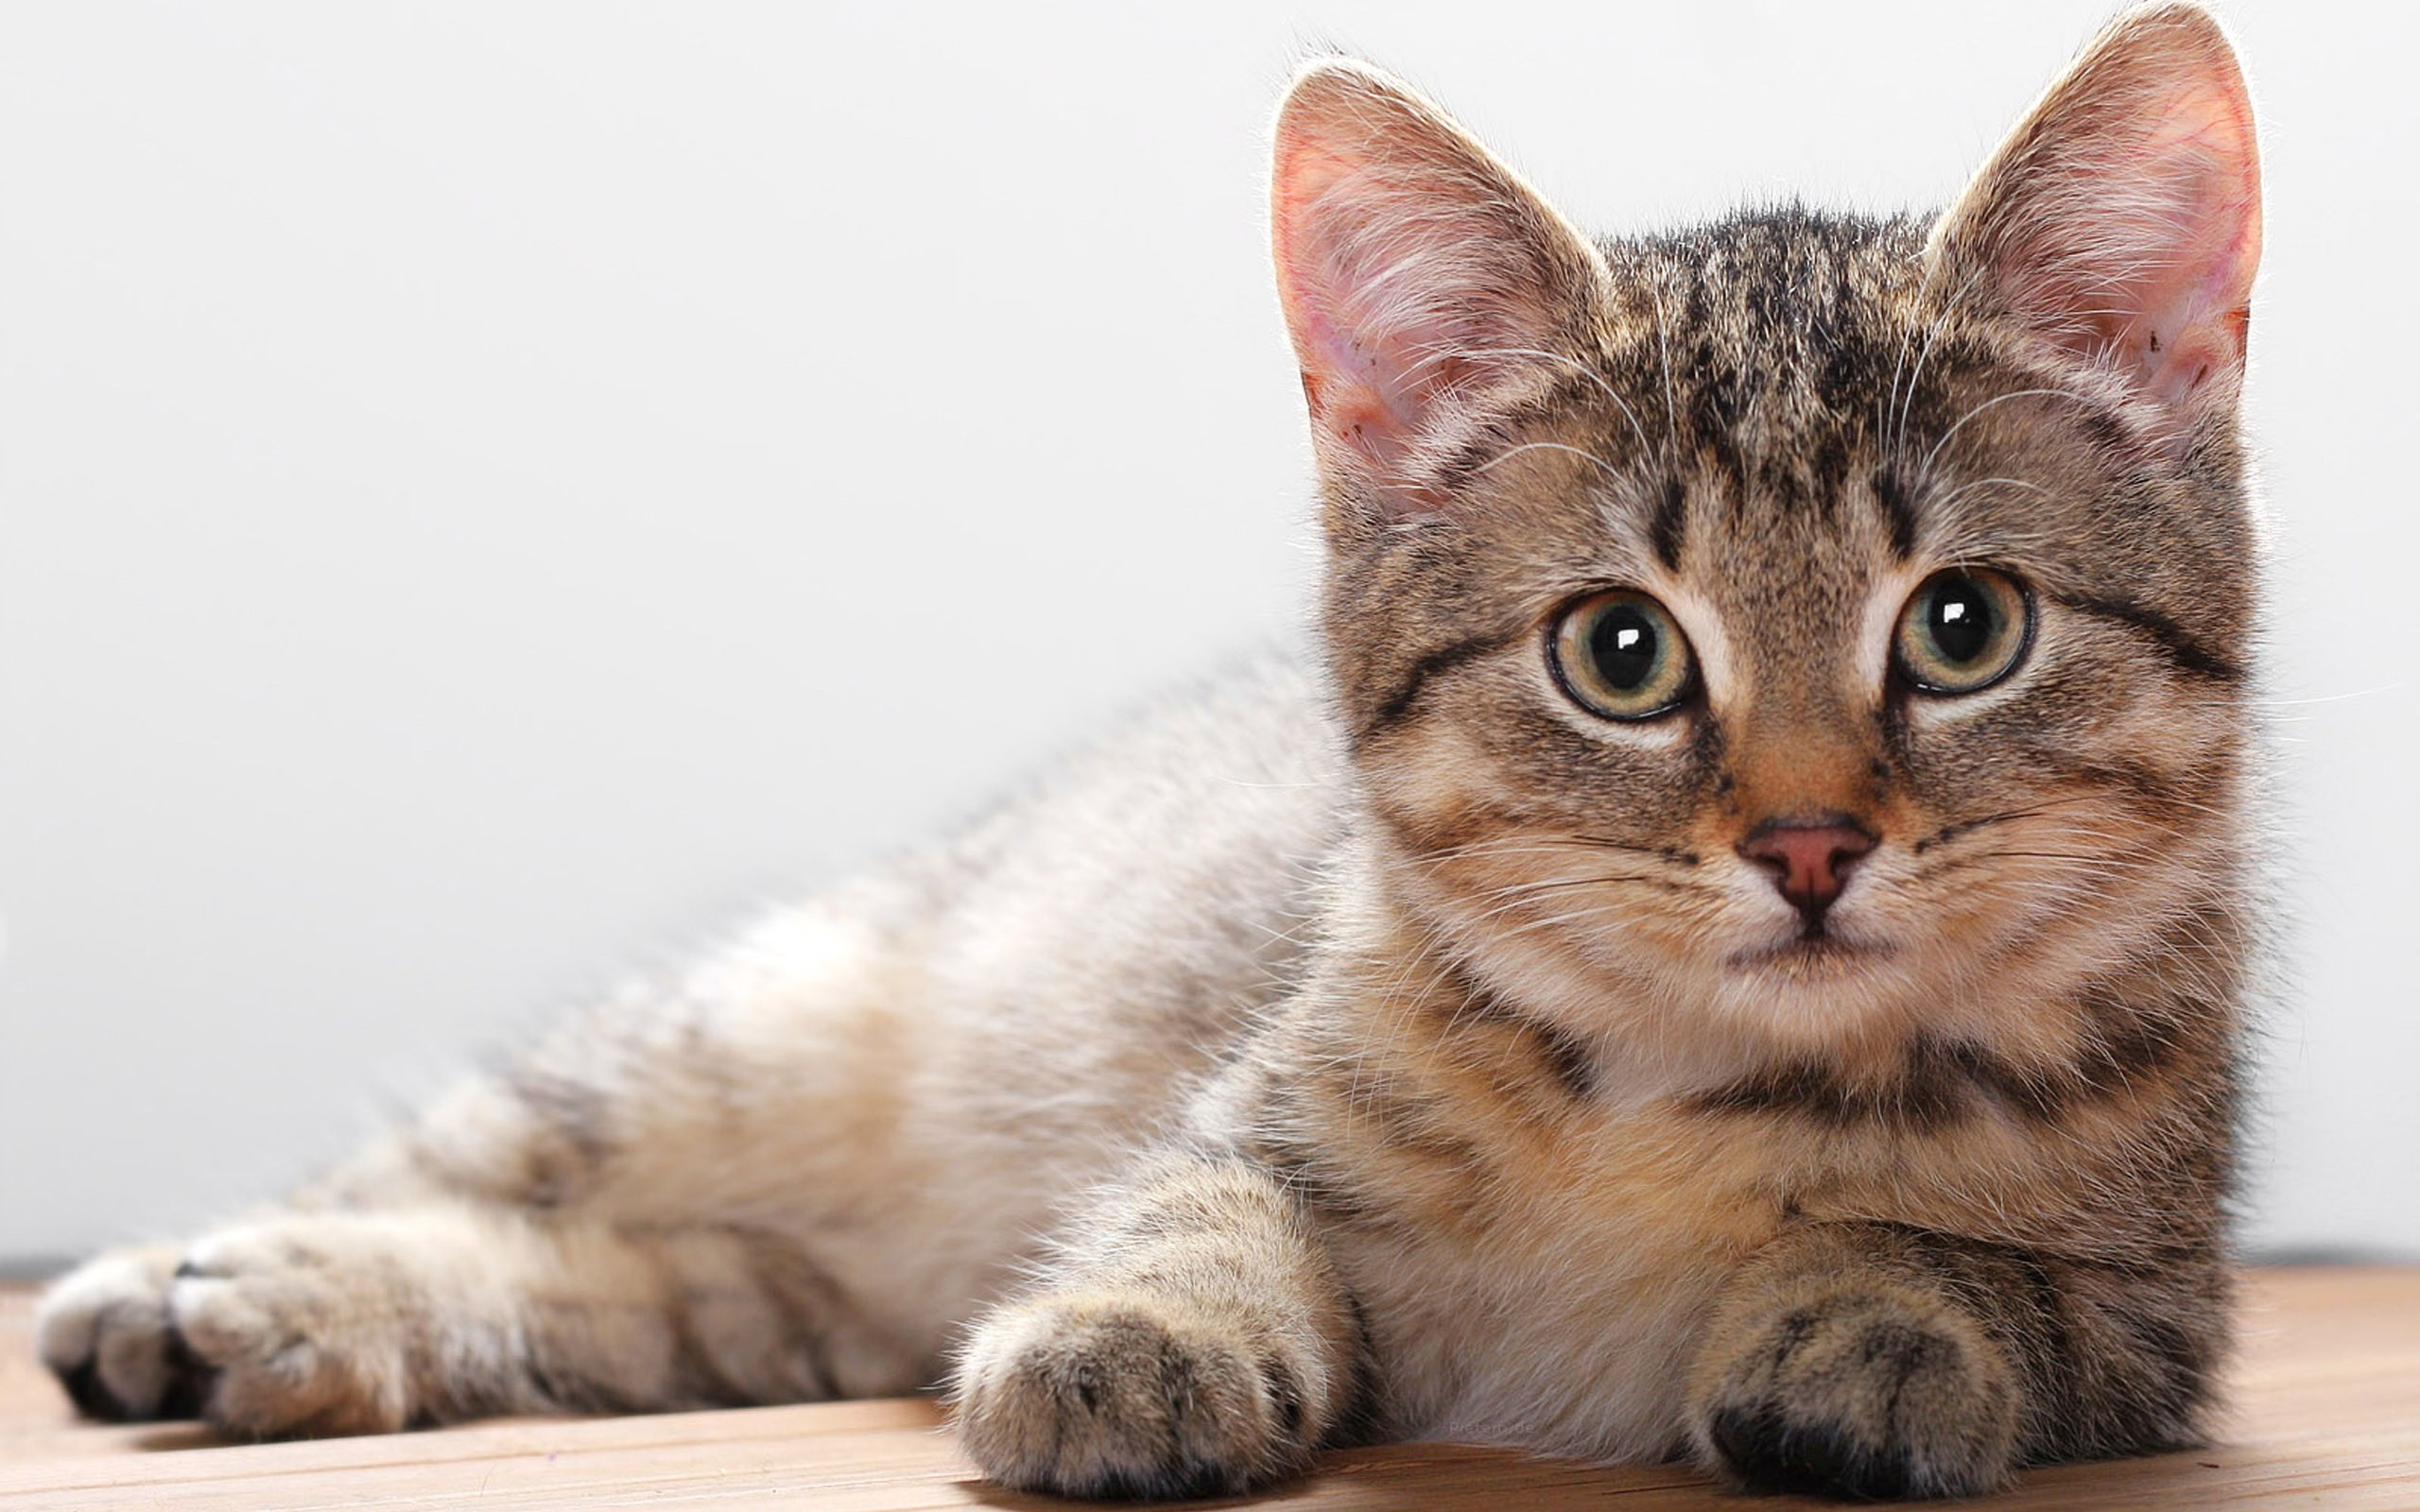

In [31]:
Image(filename="dataset/single_prediction/cat_or_dog_2.jpg", width=250, height=250)